# Foundations of AI & ML
## Session 06
### Experiment 3 - Part 1
### Applying PCA on Swiss roll data

#### we will be generating the Swiss roll data as we have done in part 0

In [1]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

#### Generating the data

In [2]:
n_samples = 1500
X, color = make_swiss_roll(n_samples)

In [3]:
X.shape

(1500, 3)

#### Let us apply PCA on the data 

In [4]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
#fit_transform fits the data and reduces the dimensionality too. 
principalComponents = pca.fit_transform(X)

In [5]:
type(principalComponents)

numpy.ndarray

In [7]:
principalComponents.shape, principalComponents[:3]

((1500, 2), array([[  2.99999509,   2.28824715],
        [-11.71891179,  -4.38181234],
        [  5.81687643,   1.52421047]]))

#### Plotting the data

<IPython.core.display.Javascript object>


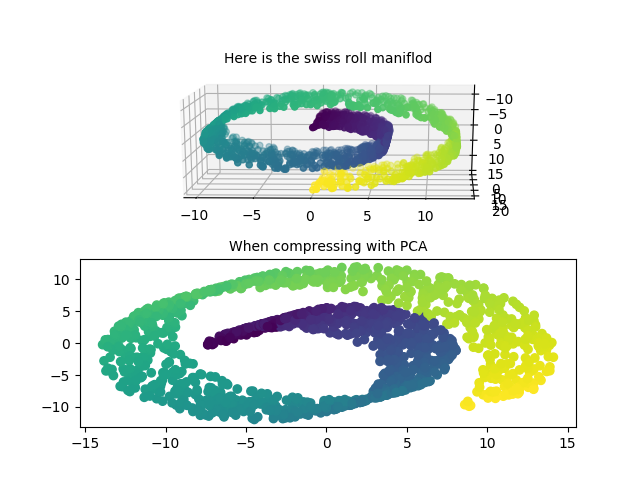

In [8]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#plt.grid(True)
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with PCA', fontsize=10)
ax.scatter(principalComponents[:,0],principalComponents[:,1],c = color)
plt.show()

#### Now let us generate swiss roll data for 300 samples with some noise in it

In [9]:
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)

#### Lets concatenate the noise data values and original data values

In [10]:
import numpy as np
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)

In [11]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
principalComponents = pca.fit_transform(con_data)

#### Let us  plot the data

<IPython.core.display.Javascript object>


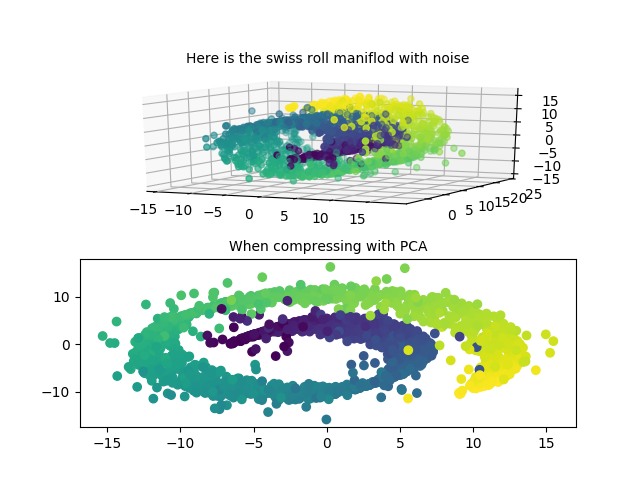

In [12]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#plt.grid(True)
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with PCA', fontsize=10)
ax.scatter(principalComponents[:,0],principalComponents[:,1],c = con_colors)
plt.show()

**Excerise:** Pan and Zoom to observe the changes

**Summary:** The problem with PCA is that it cannot tackle nonlinear manifold, as the SwissRoll. It is obvious that PCA does not respect the manifold structure. One has to use 3 dimensions to describe this manifold, and PCA just removes a dimension to get the result